# Keypoint Detectors

min_num = 14
max_num = 297

min_min_size = 1.79669
max_min_size = 31.0

min_max_size = 4.0
max_max_size = 111.079

min_mean_size = 4.0
max_mean_size = 4.0



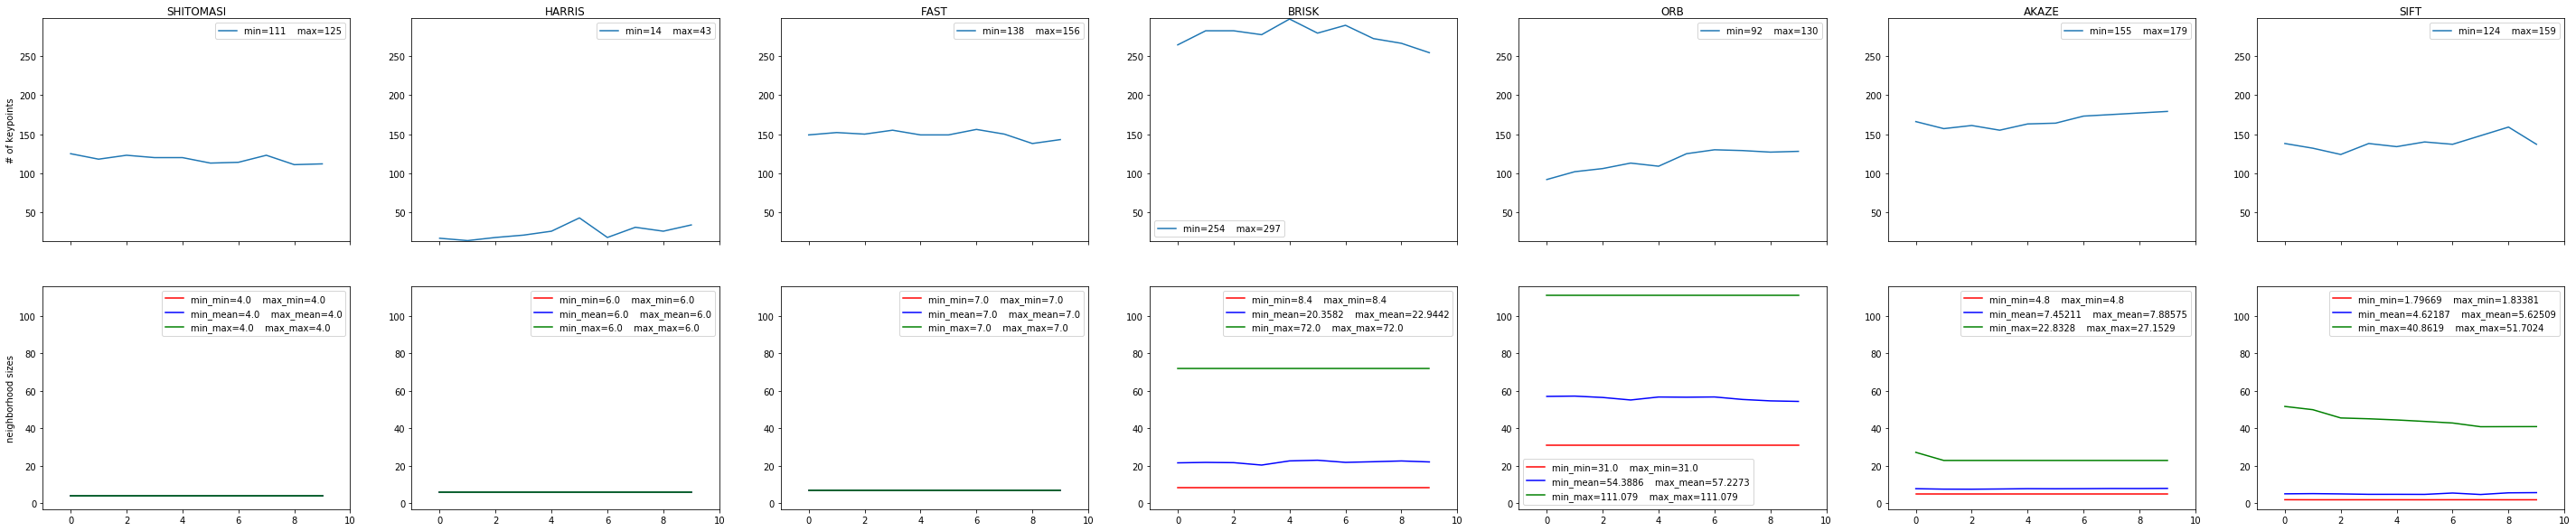

In [2]:
import os
import csv
import matplotlib.pyplot as plt

data_dir = "data/keypoints"

names = ["SHITOMASI", "HARRIS", "FAST", "BRISK", "ORB", "AKAZE", "SIFT"]
images = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
data = dict()

# read data
class KeypointLineWrapper:
    def __init__(self, lst):
        self._lst = lst
        
    def num(self):
        return int(self._lst[0])
    
    def min_size(self):
        return float(self._lst[1])
    
    def max_size(self):
        return float(self._lst[2])
    
    def mean_size(self):
        return float(self._lst[3])

min_num  = 999999999
max_num  = 0

min_min_size = 999999999
max_min_size = 0

min_max_size = 999999999
max_max_size = 0

min_mean_size = 999999999
max_mean_size = 0

for name in names:
    with open(os.path.join(data_dir, name + '_keypoints_number.txt')) as f:
        csv_reader = csv.reader(f, delimiter=' ')
        
        data[name] = { 'num': [], 'min': [], 'max': [], 'mean': [] }
        for row in csv_reader:
            lw = KeypointLineWrapper(row)
            data[name]['num'].append(lw.num())
            data[name]['min'].append(lw.min_size())
            data[name]['max'].append(lw.max_size())
            data[name]['mean'].append(lw.mean_size())
            
            min_num = min(min_num, lw.num())
            max_num = max(max_num, lw.num())

            min_min_size = min(min_min_size, lw.min_size())
            max_min_size = max(max_min_size, lw.min_size())

            min_max_size = min(min_max_size, lw.max_size())
            max_max_size = max(max_max_size, lw.max_size())
            
            min_mean_size = min(min_mean_size, lw.mean_size())
            max_mean_size = max(max_mean_size, lw.mean_size())
            
            
fig, axes = plt.subplots(nrows=2, ncols=len(names), 
                         sharex=True, sharey=False, 
                         figsize=(50, 10))

for i, name in enumerate(names):
    # number of keypoints
    axes[0][i].plot(images, data[name]['num'], label="min="+str(min(data[name]['num']))+"    max="+str(max(data[name]['num'])))
    axes[0][i].set_ylim(min_num - 1, max_num + 1)
    axes[0][i].set_xlim(-1, 10)
    axes[0][i].set_title(name)
    axes[0][i].legend()
    
    # keypoints' neigbourhood sizes
    axes[1][i].plot(images, data[name]['min'], color='red', label="min_min="+str(min(data[name]['min']))+"    max_min="+str(max(data[name]['min'])))
    axes[1][i].plot(images, data[name]['mean'], color='blue', label="min_mean="+str(min(data[name]['mean']))+"    max_mean="+str(max(data[name]['mean'])))
    axes[1][i].plot(images, data[name]['max'], color='green', label="min_max="+str(min(data[name]['max']))+"    max_max="+str(max(data[name]['max'])))
    axes[1][i].set_ylim(min_min_size - 5, max_max_size + 5)
    axes[1][i].set_xlim(-1, 10)
    axes[1][i].legend()
    
axes[0][0].set_ylabel('# of keypoints')
axes[1][0].set_ylabel('neighborhood sizes')

fig.show()

# print min/max statistics among all images and detectors
string = \
"""\
min_num = {min_num}
max_num = {max_num}

min_min_size = {min_min_size}
max_min_size = {max_min_size}

min_max_size = {min_max_size}
max_max_size = {max_max_size}

min_mean_size = {min_mean_size}
max_mean_size = {min_mean_size}
"""\
.format(min_num=min_num,
        max_num=max_num,
        min_min_size=min_min_size, 
        max_min_size=max_min_size,
        min_max_size=min_max_size,
        max_max_size=max_max_size,
        min_mean_size=min_mean_size,
        max_mean_size=min_mean_size)
print(string)

# Keypoint Matches

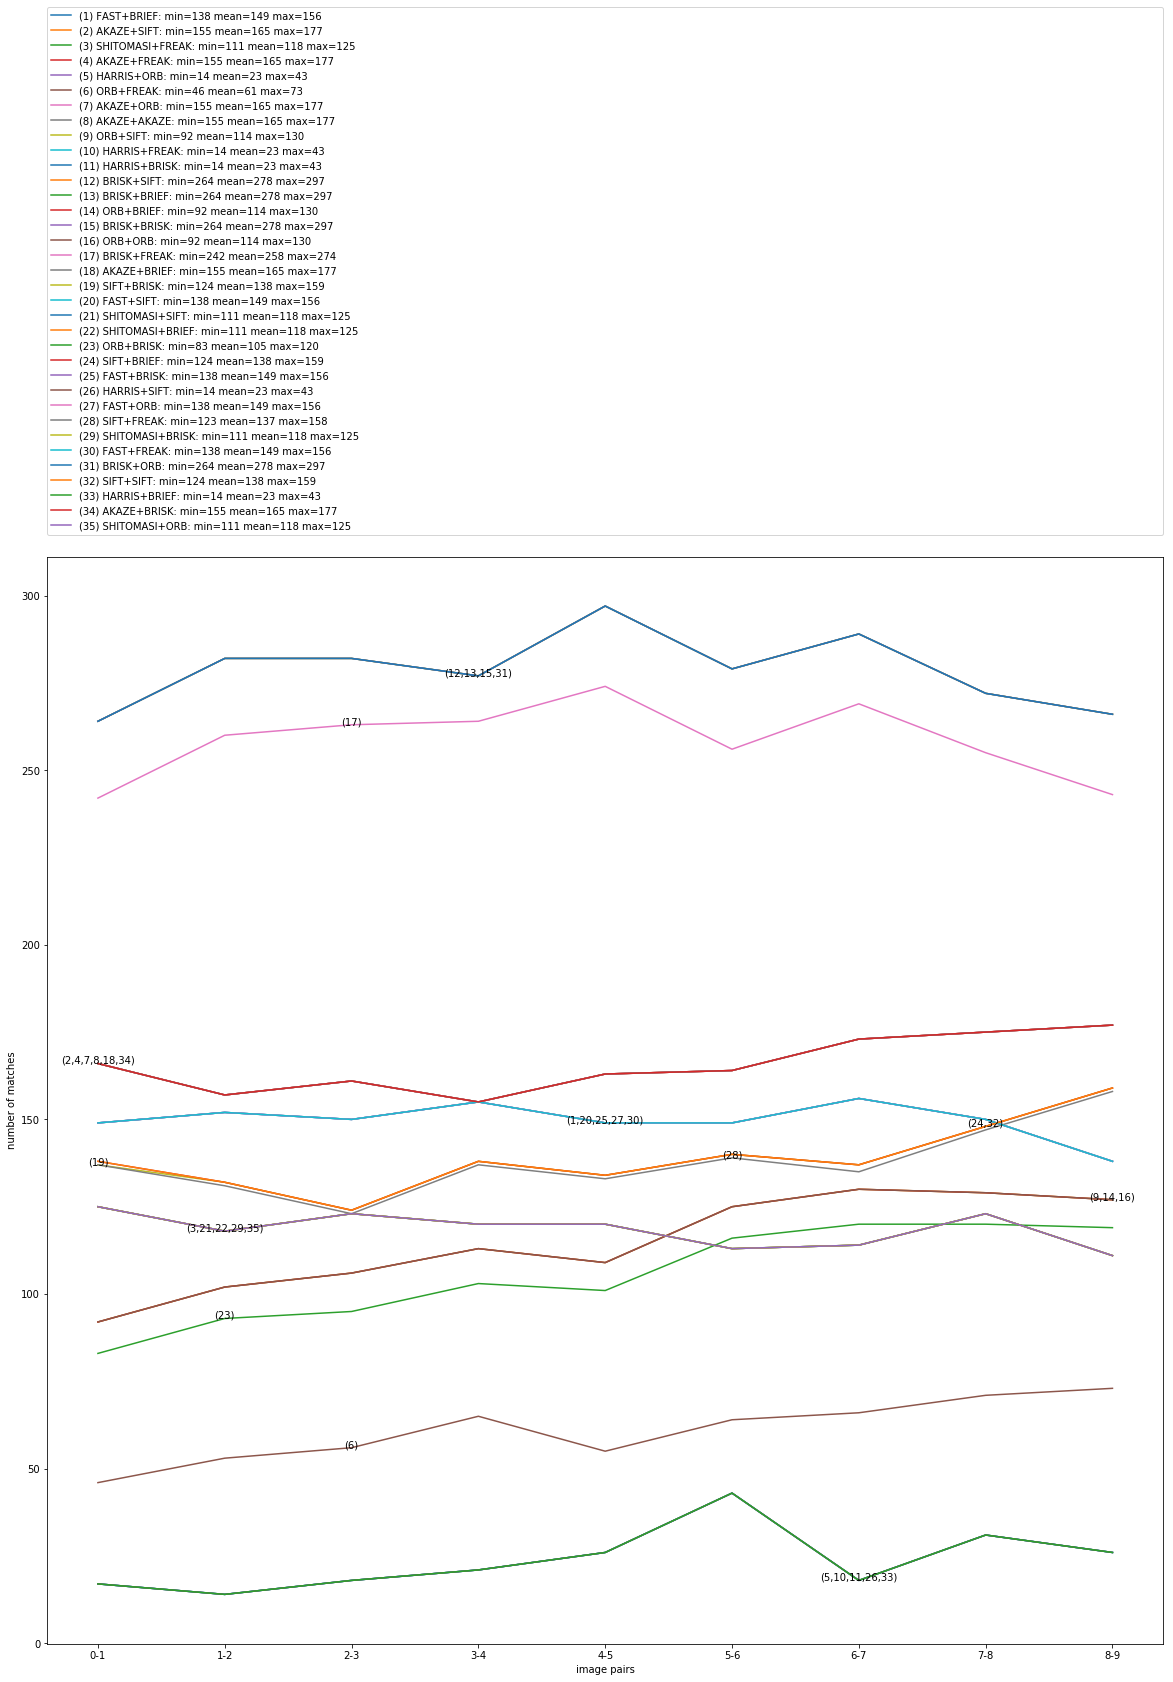

In [3]:
import os
import csv
import numpy as np
from glob import glob
from collections import OrderedDict
import matplotlib.pyplot as plt

data_dir = "data/matches"

data = OrderedDict()

# read data
class MatchesLineWrapper:
    def __init__(self, detector, descriptor, lst):
        self._lst = lst
        self._detector = detector
        self._descriptor = descriptor
        
    def detector():
        return self._detector
    
    def descriptor():
        return self._descriptor
        
    def prev_img(self):
        return int(self._lst[0])
    
    def cur_img(self):
        return int(self._lst[1])
    
    def matches(self):
        return int(self._lst[2])

files = glob(os.path.join(data_dir, '*_matches.txt'))
counter = 1
for file in files:
    
    detector = file.split('_')[0].split('/')[-1]
    descriptor = file.split('_')[1]
    
    key = '(' + str(counter) + ') ' + detector + '+' + descriptor
    counter += 1
    
    with open(file) as f:
        csv_reader = csv.reader(f, delimiter=' ')
        
        data[key] = OrderedDict()
        
        for row in csv_reader:
            lw = MatchesLineWrapper(detector, descriptor, row)
            inner_key = str(lw.prev_img()) + '-' + str(lw.cur_img())
            data[key][inner_key] = lw.matches()
            
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
label_helper = dict()
for combination_id, combination_dict in data.items():
    x = np.arange(0, len(combination_dict), 1)
    y = list(combination_dict.values())
    
    if not label_helper.get(tuple(y), None):
        label_helper[tuple(y)] = []
    label_helper[tuple(y)].append(combination_id[1:].split(')')[0])

for combination_id, combination_dict in data.items():
    x = np.arange(0, len(combination_dict), 1)
    y = list(combination_dict.values())
    
    ax.plot(x, y,
            label=combination_id + ": min=" + str(min(combination_dict.values()))
                  + " mean=" + str(sum(combination_dict.values()) // len(combination_dict.values())) 
                  + " max=" + str(max(combination_dict.values())))
    
    ax.set_xticks(np.arange(0, len(combination_dict), 1))
    ax.set_xticklabels(combination_dict.keys())
    ax.set_xlabel('image pairs')
    ax.set_ylabel('number of matches')
    
pos = 0
for line, ids in label_helper.items():
    ax.annotate('(' + ','.join(ids) + ')', # this is the text
                (pos, line[pos]), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,0), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    pos = (pos + 1) % 9
    
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=1, mode="expand", borderaxespad=0.)

plt.show()

# Detector / Descriptor Timings

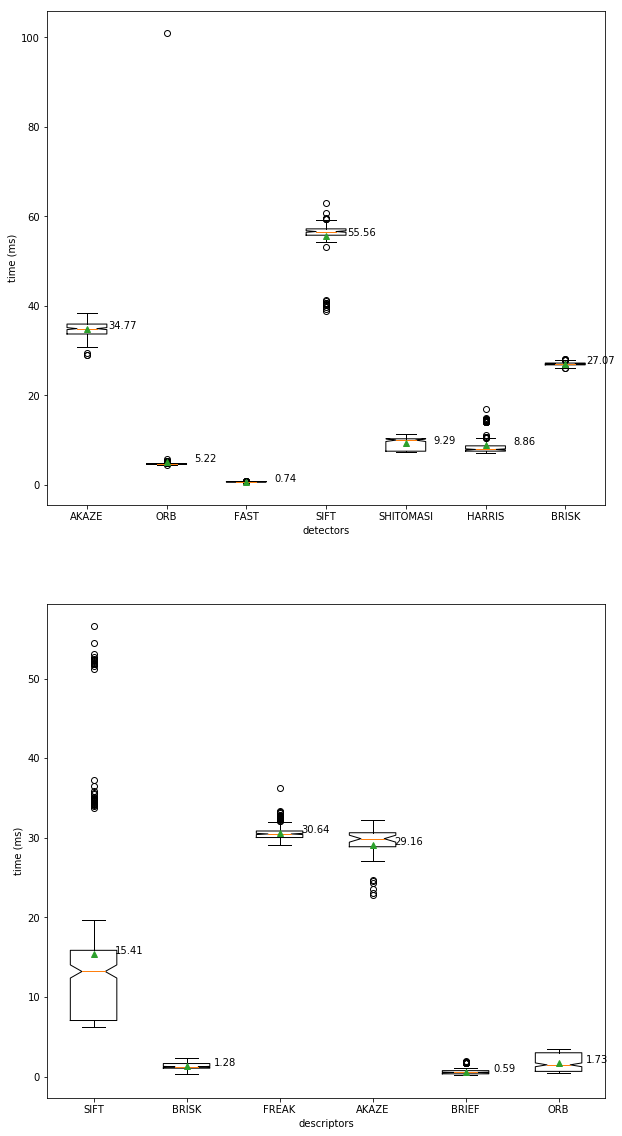

In [4]:
import os
import csv
import numpy as np
from glob import glob
from collections import OrderedDict
import matplotlib.pyplot as plt

data_detectors_dir = "data/timings/detectors"
data_descriptors_dir = "data/timings/descriptors"


data_detectors = OrderedDict()
data_descriptors = OrderedDict()

files_detectors = glob(os.path.join(data_detectors_dir, "*_detector_timings.txt"))
files_descriptors = glob(os.path.join(data_descriptors_dir, "*_descriptor_timings.txt"))

fig, axes = plt.subplots(nrows=2, ncols=1, 
                         sharex=False, sharey=False, 
                         figsize=(10, 20))
for fn in files_detectors:
    with open(fn) as f:
        csv_reader = csv.reader(f, delimiter=' ')
        detector = fn.split("_")[0].split('/')[-1]
        data_detectors[detector] = []
        for row in csv_reader:
            data_detectors[detector].append(float(row[0]))
            
for fn in files_descriptors:
    with open(fn) as f:
        csv_reader = csv.reader(f, delimiter=' ')
        descriptor = fn.split("_")[0].split('/')[-1]
        data_descriptors[descriptor] = []
        for row in csv_reader:
            data_descriptors[descriptor].append(float(row[0]))

axes[0].boxplot(list(data_detectors.values()), notch=True, 
                labels=list(data_detectors.keys()), showmeans=True)
axes[1].boxplot(list(data_descriptors.values()), notch=True, 
                labels=list(data_descriptors.keys()), showmeans=True)
axes[0].set_xlabel('detectors')
axes[0].set_ylabel('time (ms)')
axes[1].set_xlabel('descriptors')
axes[1].set_ylabel('time (ms)')

# draw statistics
for i, vals in enumerate(data_detectors.values()):
    mean = sum(vals) / len(vals)
    axes[0].annotate('%.2f' % mean, # mean
                     (i+1, mean), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(50,0), # distance from text to points (x,y)
                     ha='right') # horizontal alignment can be left, right or center
    
for i, vals in enumerate(data_descriptors.values()):
    mean = sum(vals) / len(vals)
    axes[1].annotate('%.2f' % mean, # mean
                     (i+1, mean), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(50,0), # distance from text to points (x,y)
                     ha='right') # horizontal alignment can be left, right or center

plt.show()